In [1]:
import numpy as np
import pandas as pd

### Numpy

Quickstart tutorial: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes. The number of axes is rank.

In [2]:
# create a 2 (row) x 3 (column) array from a list of lists. Type can be specified or inferred.
a=np.asarray([[1,2.5,3],[4,5,6]],dtype='float32')
print(a)
print(a.ndim)
print(a.shape)

print()

# a's transpose is a 3 x 2 array. The value of a is not changed by this.
aT = a.transpose()
print(aT)
print(aT.ndim)
print(aT.shape)

[[1.  2.5 3. ]
 [4.  5.  6. ]]
2
(2, 3)

[[1.  4. ]
 [2.5 5. ]
 [3.  6. ]]
2
(3, 2)


In [3]:
a.dtype

dtype('float32')

In [4]:
# Example of inferred type.  Here it assumes that these are integers... 
np.asarray([1,2]).dtype

dtype('int32')

In [5]:
# ... unless you specify otherwise
np.asarray([1,2],dtype="complex")

array([1.+0.j, 2.+0.j])

In [6]:
# exponential and logarithm (base e)
print(np.exp(1))
print(np.log(np.exp(1)))

2.718281828459045
1.0


In [7]:
# built-in constants
np.pi

3.141592653589793

In [8]:
# generate an m x n array of random numbers, uniform on [0,1]
np.random.rand(4,2)

array([[0.07843371, 0.54651812],
       [0.07347971, 0.16068385],
       [0.60974837, 0.41025789],
       [0.75318884, 0.40451668]])

In [9]:
# standard trigonmetric operations
np.sin(np.pi/2)

1.0

In [10]:
# generate a uniformly spaced 1-D array (start,end,number of elements)
# notice that both endpoints are included by default
np.linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [11]:
# same idea, but take base to that power
# again, both endpoints are included by default
np.logspace(0,2,9,base=10)

array([  1.        ,   1.77827941,   3.16227766,   5.62341325,
        10.        ,  17.7827941 ,  31.6227766 ,  56.23413252,
       100.        ])

In [12]:
# array of ones (input is a tuple of dimensions)
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
# element-wise operations

# add or multiply two matrices elementwise; returns ValueError if sizes do not match
print(np.ones((2,3))+np.ones((2,3)))
print()
print(np.ones((2,3))*np.ones((2,3)))
print()

# casts the constant into an appropriately sized matrix
print(np.ones((2,3))+1)
print()

print(np.ones((2,3))*5)

[[2. 2. 2.]
 [2. 2. 2.]]

[[1. 1. 1.]
 [1. 1. 1.]]

[[2. 2. 2.]
 [2. 2. 2.]]

[[5. 5. 5.]
 [5. 5. 5.]]


In [14]:
# comparison operation is also performed element-wise; can compare to constant
np.random.rand(5,5) > 0.8

array([[False, False, False, False,  True],
       [False,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False, False]])

In [15]:
# again, sin is performed element-wise
np.sin(np.random.rand(2,2))

array([[0.08925037, 0.37919255],
       [0.09122939, 0.33378197]])

In [16]:
# So is division.  Vector is cast into matrix with appropriate number of rows  
print(np.asarray([0.1,0.2]))
print()
print(np.ones((2,2))/np.asarray([0.1,0.2]))

[0.1 0.2]

[[10.  5.]
 [10.  5.]]


In [17]:
# The new shape should be compatible with the original shape. 
# If an integer, then the result will be a 1-D array of that length. 
# One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimension
print(np.asarray([0.1,0.2]).reshape(-1,1))
print()
print(np.ones((2,2))/np.asarray([0.1,0.2]).reshape(-1,1))

[[0.1]
 [0.2]]

[[10. 10.]
 [ 5.  5.]]


In [18]:
q = np.ones((2,2))/np.asarray([0.1,0.2]).reshape(-1,1)

# min of each column
print(q.min(axis=0))

# min of each row
print(q.min(axis=1))


[5. 5.]
[10.  5.]


In [19]:
tmp=np.ones((3,3))*2
tmp

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [20]:
tmp.cumsum(axis=0)

array([[2., 2., 2.],
       [4., 4., 4.],
       [6., 6., 6.]])

In [21]:
tmp.cumprod(axis=1)

array([[2., 4., 8.],
       [2., 4., 8.],
       [2., 4., 8.]])

In [22]:
# reshape into 1-D vector
tmp.reshape(-1)

array([2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [23]:
# turn a 4 x 4 into a 2 x 2 x 2 x 2
np.random.rand(4,4).reshape((2,2,2,2))

array([[[[0.01195428, 0.00116911],
         [0.00933653, 0.96049004]],

        [[0.57217335, 0.72516235],
         [0.66004533, 0.21565343]]],


       [[[0.21666912, 0.01096584],
         [0.40081451, 0.39572337]],

        [[0.02475759, 0.32305835],
         [0.55502709, 0.58025689]]]])

In [24]:
# selection of elements from array
tmp= np.random.rand(4,4)
print(tmp)
print()
print(tmp.reshape(-1)[np.asarray([2,3,4,5])])

[[0.39044249 0.17634449 0.35104937 0.64973736]
 [0.66311902 0.20800738 0.61736858 0.62845101]
 [0.94945944 0.75165792 0.24948275 0.8742014 ]
 [0.8353277  0.66355566 0.61047194 0.77938536]]

[0.35104937 0.64973736 0.66311902 0.20800738]


In [25]:
# slice
tmp[1:4,1:3]

array([[0.20800738, 0.61736858],
       [0.75165792, 0.24948275],
       [0.66355566, 0.61047194]])

In [26]:
# pick out all elements satisfying condition as 1-D array
tmp[tmp>0.5]

array([0.64973736, 0.66311902, 0.61736858, 0.62845101, 0.94945944,
       0.75165792, 0.8742014 , 0.8353277 , 0.66355566, 0.61047194,
       0.77938536])

In [27]:
# pick out rows where first element is >0.5
tmp[tmp[:,0]>0.5,:]

array([[0.66311902, 0.20800738, 0.61736858, 0.62845101],
       [0.94945944, 0.75165792, 0.24948275, 0.8742014 ],
       [0.8353277 , 0.66355566, 0.61047194, 0.77938536]])

In [28]:
tmp

array([[0.39044249, 0.17634449, 0.35104937, 0.64973736],
       [0.66311902, 0.20800738, 0.61736858, 0.62845101],
       [0.94945944, 0.75165792, 0.24948275, 0.8742014 ],
       [0.8353277 , 0.66355566, 0.61047194, 0.77938536]])

In [29]:
# Assign values to a subset of array elements.  Note that this happens in place (i.e., the value of tmp is changed)
tmp.reshape(-1)[[1,2,3,4]]=0

In [30]:
tmp

array([[0.39044249, 0.        , 0.        , 0.        ],
       [0.        , 0.20800738, 0.61736858, 0.62845101],
       [0.94945944, 0.75165792, 0.24948275, 0.8742014 ],
       [0.8353277 , 0.66355566, 0.61047194, 0.77938536]])

In [31]:
# Linear Algebra
a = np.array([[1.0, 2.0], [3.0, 4.0]])

In [32]:
# element-wise
a*a

array([[ 1.,  4.],
       [ 9., 16.]])

In [33]:
# element-wise
a/a

array([[1., 1.],
       [1., 1.]])

In [34]:
# Standard matrix multiplication.  Not element-wise!
np.dot(a,a)

array([[ 7., 10.],
       [15., 22.]])

In [35]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [36]:
print(a)
np.trace(a)

[[1. 2.]
 [3. 4.]]


5.0

### Pandas 

10 Minutes to pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html



In [37]:
# Object Creation:

# series
s = pd.Series([1,3,5,np.nan,6,8])

# dataframe
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [38]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [39]:
df

,A,B,C,D
2013-01-01,-0.348317,1.494817,0.149882,0.954707
2013-01-02,-0.949315,-0.839188,0.407143,1.732773
2013-01-03,-0.687231,-0.151475,1.674722,-1.169548
2013-01-04,-0.533041,-1.856857,-0.080444,-1.679501
2013-01-05,1.651115,-0.760959,1.808824,0.035153
2013-01-06,-1.410192,0.100154,-0.518783,0.768132


In [40]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [41]:
#Viewing Data
df.head(2)

,A,B,C,D
2013-01-01,-0.348317,1.494817,0.149882,0.954707
2013-01-02,-0.949315,-0.839188,0.407143,1.732773


In [42]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [43]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [44]:
# Sorting
print(df)
print()

# these operations do not change the value of df

# sort rows by index
print(df.sort_index(axis=0, ascending=False)) 
print()

# sort columns by column header
print(df.sort_index(axis=1, ascending=False))

                   A         B         C         D
2013-01-01 -0.348317  1.494817  0.149882  0.954707
2013-01-02 -0.949315 -0.839188  0.407143  1.732773
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548
2013-01-04 -0.533041 -1.856857 -0.080444 -1.679501
2013-01-05  1.651115 -0.760959  1.808824  0.035153
2013-01-06 -1.410192  0.100154 -0.518783  0.768132

                   A         B         C         D
2013-01-06 -1.410192  0.100154 -0.518783  0.768132
2013-01-05  1.651115 -0.760959  1.808824  0.035153
2013-01-04 -0.533041 -1.856857 -0.080444 -1.679501
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548
2013-01-02 -0.949315 -0.839188  0.407143  1.732773
2013-01-01 -0.348317  1.494817  0.149882  0.954707

                   D         C         B         A
2013-01-01  0.954707  0.149882  1.494817 -0.348317
2013-01-02  1.732773  0.407143 -0.839188 -0.949315
2013-01-03 -1.169548  1.674722 -0.151475 -0.687231
2013-01-04 -1.679501 -0.080444 -1.856857 -0.533041
2013-01-05  0.035153  1.80882

In [45]:
print(df)
print()

# sort rows using values in a particular column
print(df.sort_values(by='B')) # axis defaults to 0
print()

# sort columns using values corresponding to a particular row index
print(df.sort_values(axis=1,by='2013-01-03'))

                   A         B         C         D
2013-01-01 -0.348317  1.494817  0.149882  0.954707
2013-01-02 -0.949315 -0.839188  0.407143  1.732773
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548
2013-01-04 -0.533041 -1.856857 -0.080444 -1.679501
2013-01-05  1.651115 -0.760959  1.808824  0.035153
2013-01-06 -1.410192  0.100154 -0.518783  0.768132

                   A         B         C         D
2013-01-04 -0.533041 -1.856857 -0.080444 -1.679501
2013-01-02 -0.949315 -0.839188  0.407143  1.732773
2013-01-05  1.651115 -0.760959  1.808824  0.035153
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548
2013-01-06 -1.410192  0.100154 -0.518783  0.768132
2013-01-01 -0.348317  1.494817  0.149882  0.954707

                   D         A         B         C
2013-01-01  0.954707 -0.348317  1.494817  0.149882
2013-01-02  1.732773 -0.949315 -0.839188  0.407143
2013-01-03 -1.169548 -0.687231 -0.151475  1.674722
2013-01-04 -1.679501 -0.533041 -1.856857 -0.080444
2013-01-05  0.035153  1.65111

In [46]:
# Descriptive statistics of each column
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.379497,-0.335585,0.573557,0.106953
std,1.061099,1.124541,0.955674,1.313405
min,-1.410192,-1.856857,-0.518783,-1.679501
25%,-0.883794,-0.819631,-0.022863,-0.868372
50%,-0.610136,-0.456217,0.278513,0.401643
75%,-0.394498,0.037247,1.357827,0.908063
max,1.651115,1.494817,1.808824,1.732773


In [47]:
# Selection

# select a particular column (with row index) 
df['A']

2013-01-01   -0.348317
2013-01-02   -0.949315
2013-01-03   -0.687231
2013-01-04   -0.533041
2013-01-05    1.651115
2013-01-06   -1.410192
Freq: D, Name: A, dtype: float64

In [48]:
# select rows by slicing
print(df[1:3])
print()

# equivalent but more flexible; select rows by integer positions
print(df.iloc[1:3,:])
print()

# subsets of rows and columns, can slice or list
print(df.iloc[1:3,[1,3]])

                   A         B         C         D
2013-01-02 -0.949315 -0.839188  0.407143  1.732773
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548

                   A         B         C         D
2013-01-02 -0.949315 -0.839188  0.407143  1.732773
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548

                   B         D
2013-01-02 -0.839188  1.732773
2013-01-03 -0.151475 -1.169548


In [49]:
# select rows or columns by value
df.loc[dates[0]] # equivalent to df.loc['2013-01-01']

A   -0.348317
B    1.494817
C    0.149882
D    0.954707
Name: 2013-01-01 00:00:00, dtype: float64

In [50]:
# can select row and column values
df.loc[:,['A','C']]

,A,C
2013-01-01,-0.348317,0.149882
2013-01-02,-0.949315,0.407143
2013-01-03,-0.687231,1.674722
2013-01-04,-0.533041,-0.080444
2013-01-05,1.651115,1.808824
2013-01-06,-1.410192,-0.518783


In [51]:
# note that the end value is included for loc...
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.949315,-0.839188
2013-01-03,-0.687231,-0.151475
2013-01-04,-0.533041,-1.856857


In [52]:
# ... but not for iloc
df.iloc[1:4,0:2]

,A,B
2013-01-02,-0.949315,-0.839188
2013-01-03,-0.687231,-0.151475
2013-01-04,-0.533041,-1.856857


In [53]:
# Boolean Indexing

# select all rows where a condition is met
df[df.A > 0]

,A,B,C,D
2013-01-05,1.651115,-0.760959,1.808824,0.035153


In [54]:
# Filling in missing values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[1]:dates[2],'E'] = 1
df1.loc[[dates[0],dates[3]],'E'] = 2

In [55]:
df1

,A,B,C,D,E
2013-01-01,-0.348317,1.494817,0.149882,0.954707,2.0
2013-01-02,-0.949315,-0.839188,0.407143,1.732773,1.0
2013-01-03,-0.687231,-0.151475,1.674722,-1.169548,1.0
2013-01-04,-0.533041,-1.856857,-0.080444,-1.679501,2.0


In [56]:
# Dropping rows with any missing values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[1]:dates[2],'E'] = 1
print(df1)
print()
print(df1.dropna(how='any'))

                   A         B         C         D    E
2013-01-01 -0.348317  1.494817  0.149882  0.954707  NaN
2013-01-02 -0.949315 -0.839188  0.407143  1.732773  1.0
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548  1.0
2013-01-04 -0.533041 -1.856857 -0.080444 -1.679501  NaN

                   A         B         C         D    E
2013-01-02 -0.949315 -0.839188  0.407143  1.732773  1.0
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548  1.0


In [57]:
# Fill in all missing values with a given value
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[1]:dates[2],'E'] = 1
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.348317,1.494817,0.149882,0.954707,5.0
2013-01-02,-0.949315,-0.839188,0.407143,1.732773,1.0
2013-01-03,-0.687231,-0.151475,1.674722,-1.169548,1.0
2013-01-04,-0.533041,-1.856857,-0.080444,-1.679501,5.0


In [58]:
# element-wise: is each value missing?
print(df1)
print()
pd.isnull(df1)

                   A         B         C         D    E
2013-01-01 -0.348317  1.494817  0.149882  0.954707  NaN
2013-01-02 -0.949315 -0.839188  0.407143  1.732773  1.0
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548  1.0
2013-01-04 -0.533041 -1.856857 -0.080444 -1.679501  NaN



,A,B,C,D,E
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,True


In [59]:
# Apply an operation to each column (e.g., sum across all rows for that column)
print(df)
print()
df.apply(sum,axis=0)

                   A         B         C         D
2013-01-01 -0.348317  1.494817  0.149882  0.954707
2013-01-02 -0.949315 -0.839188  0.407143  1.732773
2013-01-03 -0.687231 -0.151475  1.674722 -1.169548
2013-01-04 -0.533041 -1.856857 -0.080444 -1.679501
2013-01-05  1.651115 -0.760959  1.808824  0.035153
2013-01-06 -1.410192  0.100154 -0.518783  0.768132



A   -2.276981
B   -2.013508
C    3.441344
D    0.641717
dtype: float64

In [60]:
# Apply an operation to each row (e.g., sum across all columns for that row)
df.apply(sum,axis=1)

2013-01-01    2.251089
2013-01-02    0.351414
2013-01-03   -0.333531
2013-01-04   -4.149844
2013-01-05    2.734133
2013-01-06   -1.060690
Freq: D, dtype: float64

In [61]:
# Apply an operation element-wise
df.applymap(lambda x: x*1000)

,A,B,C,D
2013-01-01,-348.317169,1494.817078,149.882449,954.706587
2013-01-02,-949.314502,-839.187856,407.143269,1732.773457
2013-01-03,-687.230569,-151.475107,1674.722048,-1169.547639
2013-01-04,-533.041387,-1856.857300,-80.444296,-1679.500833
2013-01-05,1651.114879,-760.959240,1808.823792,35.153471
2013-01-06,-1410.192386,100.153978,-518.783416,768.132311


In [62]:
df3 = df
df3['E'] = 'hello'
df3*1000

,A,B,C,D,E
2013-01-01,-348.317169,1494.817078,149.882449,954.706587,hellohellohellohellohellohellohellohellohelloh...
2013-01-02,-949.314502,-839.187856,407.143269,1732.773457,hellohellohellohellohellohellohellohellohelloh...
2013-01-03,-687.230569,-151.475107,1674.722048,-1169.547639,hellohellohellohellohellohellohellohellohelloh...
2013-01-04,-533.041387,-1856.857300,-80.444296,-1679.500833,hellohellohellohellohellohellohellohellohelloh...
2013-01-05,1651.114879,-760.959240,1808.823792,35.153471,hellohellohellohellohellohellohellohellohelloh...
2013-01-06,-1410.192386,100.153978,-518.783416,768.132311,hellohellohellohellohellohellohellohellohelloh...


In [63]:
#Concat, Join, Append.

# concatenate rows together
df = pd.DataFrame(np.random.randn(10, 4))
print(df)
print()

pieces = [df[:2], df[5:7], df[8:]]
print(pd.concat(pieces))
print()

# concatenate columns together
pieces = [df.iloc[:,0:2], df.iloc[:,3]]
print(pd.concat(pieces,axis=1))
print()


          0         1         2         3
0  0.832002  0.530756  1.119756  0.012803
1 -2.701861 -0.066771  1.735963 -0.563239
2  1.118214 -1.243823  1.012815 -0.258120
3 -0.305130  0.128515  0.431886 -0.261644
4 -0.666352  0.314665 -0.500735 -0.656866
5  0.098261  0.253863  0.429355 -0.532132
6 -1.439702  0.235202  0.920458  0.167518
7  1.483086 -0.148002  0.760466  0.453643
8 -2.014036 -0.419497 -0.345492  0.116361
9 -0.375694  0.328779 -1.806276  1.748642

          0         1         2         3
0  0.832002  0.530756  1.119756  0.012803
1 -2.701861 -0.066771  1.735963 -0.563239
5  0.098261  0.253863  0.429355 -0.532132
6 -1.439702  0.235202  0.920458  0.167518
8 -2.014036 -0.419497 -0.345492  0.116361
9 -0.375694  0.328779 -1.806276  1.748642

          0         1         3
0  0.832002  0.530756  0.012803
1 -2.701861 -0.066771 -0.563239
2  1.118214 -1.243823 -0.258120
3 -0.305130  0.128515 -0.261644
4 -0.666352  0.314665 -0.656866
5  0.098261  0.253863 -0.532132
6 -1.439702  0.235

In [64]:
x = pd.DataFrame({'key': ['B', 'A'], 'xval': [2, 1]})
y = pd.DataFrame({'key': ['A', 'B','C'], 'yval': [4, 5,6]})
print(x)
print()
print(y)

  key  xval
0   B     2
1   A     1

  key  yval
0   A     4
1   B     5
2   C     6


In [65]:
print(y.merge(x,left_on="key",right_on="key",how="left"))
print()
print(x.merge(y,left_on="key",right_on="key",how="left"))
print()
print(x.merge(y,left_on="key",right_on="key",how="right"))

  key  yval  xval
0   A     4   1.0
1   B     5   2.0
2   C     6   NaN

  key  xval  yval
0   B     2     5
1   A     1     4

  key  xval  yval
0   A   1.0     4
1   B   2.0     5
2   C   NaN     6


In [66]:
# Append
print(y.append(x, ignore_index=True))
print()
print(pd.concat([y,x],ignore_index=True))

  key  yval  xval
0   A   4.0   NaN
1   B   5.0   NaN
2   C   6.0   NaN
3   B   NaN   2.0
4   A   NaN   1.0

  key  yval  xval
0   A   4.0   NaN
1   B   5.0   NaN
2   C   6.0   NaN
3   B   NaN   2.0
4   A   NaN   1.0


In [67]:
# Grouping
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
'C' : np.random.randn(8),'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.415218,0.001086
1,bar,one,0.203611,-0.602953
2,foo,two,-0.916785,-0.324352
3,bar,three,-0.542937,-1.172521
4,foo,two,0.145375,-0.008370
5,bar,two,0.425398,-0.624046
6,foo,one,-1.093719,-0.269866
7,foo,three,1.318554,-0.092025


In [68]:
df.groupby("A").apply(lambda x: x.loc[:,"D"].sum())

A
bar   -2.399519
foo   -0.693526
dtype: float64

In [69]:
tmp=df.groupby(['A','B']).sum()
tmp

C         D
A   B                        
bar one    0.203611 -0.602953
    three -0.542937 -1.172521
    two    0.425398 -0.624046
foo one   -0.678501 -0.268779
    three  1.318554 -0.092025
    two   -0.771409 -0.332722

In [70]:
# Stack and unstack
print(tmp)
print()

stacked=tmp.stack(level=-1) # -1, i.e., the last column, is the default level
print(stacked)
print()

unstacked = stacked.unstack(level=-1) # -1, i.e., the last column, is the default level
print(unstacked)

                  C         D
A   B                        
bar one    0.203611 -0.602953
    three -0.542937 -1.172521
    two    0.425398 -0.624046
foo one   -0.678501 -0.268779
    three  1.318554 -0.092025
    two   -0.771409 -0.332722

A    B       
bar  one    C    0.203611
            D   -0.602953
     three  C   -0.542937
            D   -1.172521
     two    C    0.425398
            D   -0.624046
foo  one    C   -0.678501
            D   -0.268779
     three  C    1.318554
            D   -0.092025
     two    C   -0.771409
            D   -0.332722
dtype: float64

                  C         D
A   B                        
bar one    0.203611 -0.602953
    three -0.542937 -1.172521
    two    0.425398 -0.624046
foo one   -0.678501 -0.268779
    three  1.318554 -0.092025
    two   -0.771409 -0.332722


# Sklearn

1.Preprocessing.

2.Supervised Learning.

3.Model selection.


In [71]:
# Check your version and make sure >0.18
import sklearn
sklearn.__version__

'1.0.2'

### 1. Preprocessing.

#### Scale,  Normalization, Binarization, and so on.

In [72]:
from sklearn import preprocessing

In [73]:
import numpy as np
X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
             [ 0.,  1., -1.]])
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [74]:
# make each column have mean = 0 and std dev = 1
X_scaled = preprocessing.scale(X)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [75]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [76]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [77]:
# Equivalently, we could use:
(X-X.mean(axis=0))/X.std(axis=0)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

#### Normalize 

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [78]:
print(preprocessing.normalize(X,axis=0))
print()

# equivalently, we could use:
print(X/np.sqrt((X*X).sum(axis=0)))

[[ 0.4472136  -0.70710678  0.89442719]
 [ 0.89442719  0.          0.        ]
 [ 0.          0.70710678 -0.4472136 ]]

[[ 0.4472136  -0.70710678  0.89442719]
 [ 0.89442719  0.          0.        ]
 [ 0.          0.70710678 -0.4472136 ]]


Sklearn has a ton of methods implemented, many of which we will see later in the course!

### Supervised Learning 

(Regression/Classification)

Linear Models (Ordinary Least Squares, Logistic Regression, Lasso and Ridge...)

Kernel regression

SVM

Gaussian Processes

Decision Trees and Random Forests (next class)

Naive Bayes

Supervised Neural Network models (incl. Deep Learning)

### Unsupervised Learning

Clustering.

Dimension Reduction.

Representation in Neural Networks such as RBM

### Logistic Regression

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

Matplotlib is building the font cache; this may take a moment.


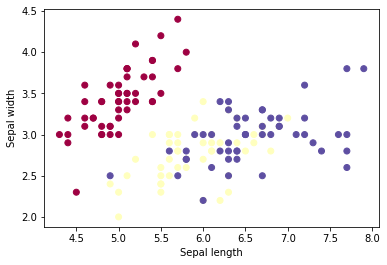

In [80]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

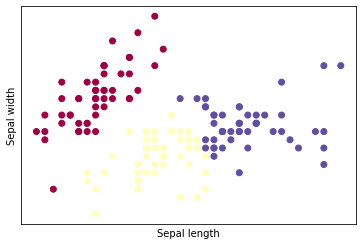

In [81]:
logreg = linear_model.LogisticRegression()

# we create an instance of logistic regression classifier and fit the data.
logreg.fit(X, Y)

# now the color represents the predicted class
plt.scatter(X[:, 0], X[:, 1], c=logreg.predict(X), cmap=plt.cm.Spectral)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())

plt.show()


### Tips: How to use packages from sklearn.

Step one: What is the problem we want to solve and what is the model we want to fit. 

Step two: What are the hyper-parameters related to model structure.

Step three: What are the inputs dataframe and what are the parameters we want to tune.

Step four: What are hyper-parameters for training process. (learning rate, iteration max...)

Step five: What are the outputs and tuned parameters.